<a href="https://colab.research.google.com/github/balakrishnanvinchu/fair_accountable_machine_learning/blob/main/Group_16_Assignment_2_FATML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 16 - Assignment 2

| Name | Email | Contributions |
| -----|-------| -------------- |
| BALAKRISHNAN V S | 2024aa05017@wilp.bits-pilani.ac.in | 100% |
| JAISRI S | 2024aa05138@wilp.bits-pilani.ac.in | 100% |
| AKHILESH KUMAR SHRIVASTAVA | 2024aa05860@wilp.bits-pilani.ac.in | 100% |


 ## Credit Card Approval Prediction using MLP with LIME and SHAP Explanations

 ## Task 1: Load the dataset and perform exploratory data analysis via appropriate visualization. Normalize the features as appropriate

In [ ]:
%pip install lime shap

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import lime
import lime.lime_tabular
import shap
from sklearn.utils import resample
import random
from IPython.display import display
import IPython

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

In [20]:
# Load the dataset
data = pd.read_csv('UniversalBank.csv')

# Display basic information
print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
display(data.head())

Dataset shape: (5000, 14)

First 5 rows:


ID  Age  Experience  Income  ZIP Code  ...  Personal Loan  \
0   1   25           1      49     91107  ...              0   
1   2   45          19      34     90089  ...              0   
2   3   39          15      11     94720  ...              0   
3   4   35           9     100     94112  ...              0   
4   5   35           8      45     91330  ...              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  

[5 rows x 14 columns]

In [21]:
# Basic statistics
print("\nDescriptive statistics:")
display(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Descriptive statistics:


ID          Age   Experience       Income      ZIP Code  ...  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000  ...   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000  ...   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197  ...   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000  ...   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000  ...   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000  ...   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000  ...   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000  ...   

       Personal Loan  Securities Account  CD Account       Online   CreditCard  
count    5000.000000         5000.000000  5000.00000  5000.000000  5000.000000  
mean        0.096000            0.104400     0.06040     0.596800     0.294000  
std         0.294621            0.305809     0.23825     0.490589     0.455637  
min         0.000000            0.000000     0.00000     0.000000     0.000000  
25%         0.000000            0.000000     0.00000     0.000000     0.000000  
50%         0.000000            0.000000     0.00000     1.000000     0.000000  
75%         0.000000            0.000000     0.00000     1.000000     1.000000  
max         1.000000            1.000000     1.00000     1.000000     1.000000  

[8 rows x 14 columns]


Missing values:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
                     ..
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Length: 14, dtype: int64


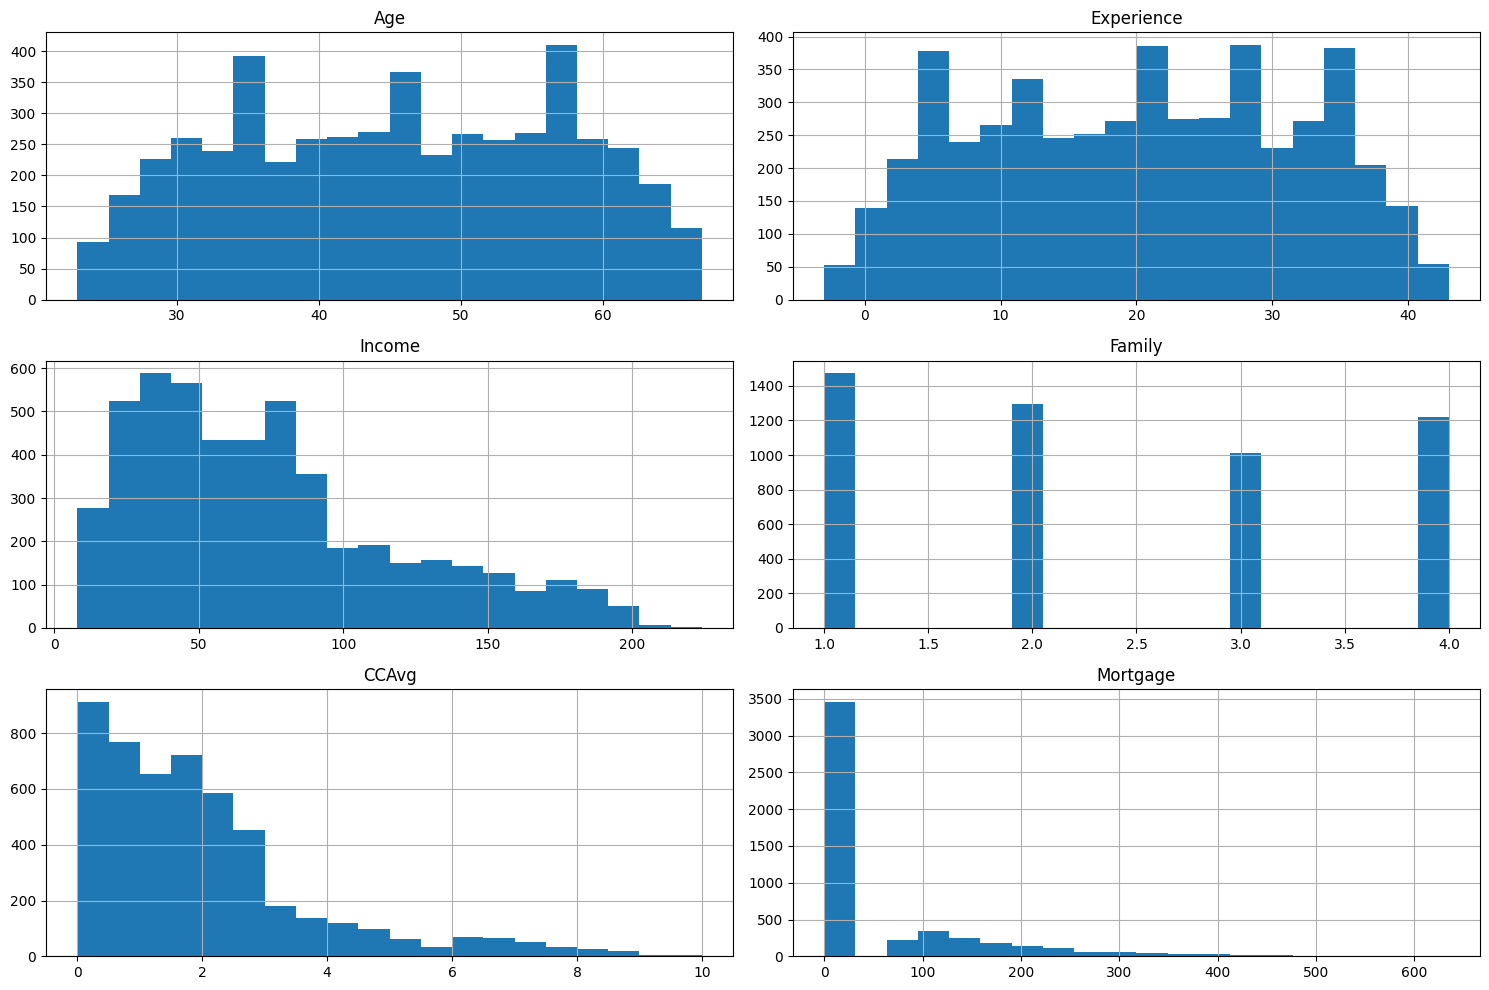

In [22]:
# Visualize the distribution of numerical features
numerical_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
data[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

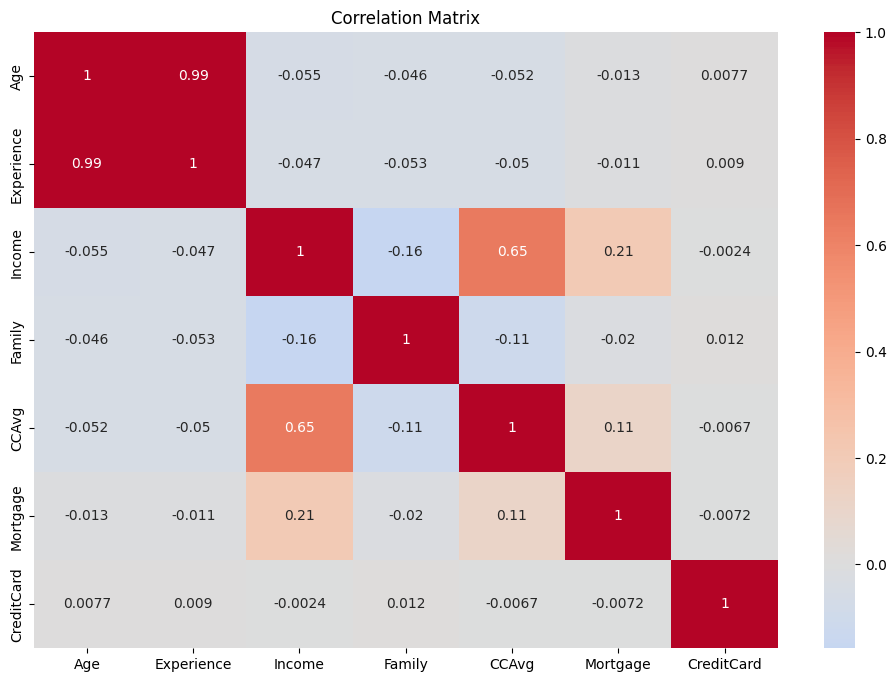

In [23]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data[numerical_cols + ['CreditCard']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Prepare data for modeling
# Drop ID and ZIP Code as they are not useful for prediction
data = data.drop(['ID', 'ZIP Code'], axis=1)

# Split into features and target
X = data.drop('CreditCard', axis=1)
y = data['CreditCard']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (we'll use the entire data for cross-validation)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (4000, 11)
Test set shape: (1000, 11)


 ## Task 2: Using 5 fold cross-validation, implement a multilayer perceptron with no more than 2 hidden layers. Report the training error and cross-validation error.

In [25]:
# Initialize MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)

# Perform 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(mlp, X_scaled, y, cv=kfold, scoring='accuracy')

# Train the model on full training set
mlp.fit(X_train, y_train)

# Calculate training error
train_pred = mlp.predict(X_train)
train_error = 1 - accuracy_score(y_train, train_pred)

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: {:.4f}".format(cv_scores.mean()))
print("Training error: {:.4f}".format(train_error))

Cross-validation scores: [0.681 0.682 0.709 0.678 0.689]
Mean CV accuracy: 0.6878
Training error: 0.2057


In [26]:
# Initialize MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(80, 30), max_iter=1000, random_state=42)

# Perform 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(mlp, X_scaled, y, cv=kfold, scoring='accuracy')

# Train the model on full training set
mlp.fit(X_train, y_train)

# Calculate training error
train_pred = mlp.predict(X_train)
train_error = 1 - accuracy_score(y_train, train_pred)

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: {:.4f}".format(cv_scores.mean()))
print("Training error: {:.4f}".format(train_error))

Cross-validation scores: [0.696 0.682 0.7   0.648 0.701]
Mean CV accuracy: 0.6854
Training error: 0.1913


 ## Task 3: Randomly select 5 data points. Apply LIME to explain the individual outcome predicted by the MLP. Then implement submodular pick and derive a LIME explanation for 10% of training data points with no more than 10 explanations. Using these explanations, predict whether credit card is approved or not using the entire training data and calculate the classification error.

In [27]:
# Randomly select 5 data points
np.random.seed(42)
sample_indices = np.random.choice(X_train.shape[0], 5, replace=False)
samples = X_train[sample_indices]
sample_labels = y_train.iloc[sample_indices]

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=X.columns,
    class_names=['No Credit Card', 'Credit Card'],
    verbose=True,
    mode='classification'
)

In [35]:
# Explain predictions for the 5 samples
for i, (sample, label) in enumerate(zip(samples, sample_labels)):
    print(f"\nExplanation for sample {i+1} (True label: {label})")
    exp = explainer.explain_instance(sample, mlp.predict_proba, num_features=5)
    #display only one HTML representation
    if i == 0 or i == 1:
        display(IPython.display.HTML(exp.as_html()))


Explanation for sample 1 (True label: 1)
Intercept 0.5037072238668607
Prediction_local [0.29272586]
Right: 0.5894394997076419



Explanation for sample 2 (True label: 0)
Intercept 0.5298145577238602
Prediction_local [0.13285708]
Right: 0.08017557472590192



Explanation for sample 3 (True label: 1)
Intercept 0.025622148627299612
Prediction_local [0.77243549]
Right: 0.9999486349787456

Explanation for sample 4 (True label: 0)
Intercept 0.513424315902519
Prediction_local [0.24814297]
Right: 0.11957885569948563

Explanation for sample 5 (True label: 1)
Intercept 0.489680679875444
Prediction_local [0.31195429]
Right: 0.2516967498532311


In [29]:
# Implement Submodular Pick for LIME explanations

def submodular_pick(X, explainer, model, num_explanations=10, num_samples=0.1):
    # Select 10% of data
    n_samples = int(X.shape[0] * num_samples)
    sample_indices = np.random.choice(X.shape[0], n_samples, replace=False)
    X_samples = X[sample_indices]

    # Get explanations for all samples
    explanations = []
    for sample in X_samples:
        exp = explainer.explain_instance(sample, model.predict_proba, num_features=5)
        explanations.append(exp)

    # For simplicity, we'll just pick the first 'num_explanations' explanations
    # In a real implementation, we would use submodular optimization to pick diverse explanations
    selected_explanations = explanations[:num_explanations]
    selected_indices = sample_indices[:num_explanations]

    return selected_explanations, selected_indices

In [30]:
# Get submodular pick explanations
sp_explanations, sp_indices = submodular_pick(X_train, explainer, mlp)

Intercept 0.007064454223891237
Prediction_local [0.78472705]
Right: 0.9998552655476988
Intercept 0.5029211133031297
Prediction_local [0.18820053]
Right: 0.1756640733304128
Intercept 0.762165739994831
Prediction_local [0.04012307]
Right: 0.8644738193331692
Intercept 0.5190006409961467
Prediction_local [0.29133871]
Right: 0.13822293123301913
Intercept 0.7579596033416088
Prediction_local [0.05269258]
Right: 7.92407315717737e-09
Intercept 0.7735295004432854
Prediction_local [0.05327086]
Right: 1.0955344158544954e-05
Intercept 0.5006582146163305
Prediction_local [0.33803575]
Right: 0.2025813196681698
Intercept 0.5159370943984183
Prediction_local [0.26706159]
Right: 0.2850826048895714
Intercept 0.5237908800535088
Prediction_local [0.33424629]
Right: 0.1363287990198188
Intercept 0.4992037351878914
Prediction_local [0.29255315]
Right: 0.23325153722184994
Intercept 0.47576023771373877
Prediction_local [0.30529877]
Right: 0.4785773180886006
Intercept 0.5574924526370988
Prediction_local [0.175038

In [34]:
# Display the selected explanations
for i, exp in enumerate(sp_explanations):
    print(f"\nSubmodular Pick Explanation {i+1} (Sample index: {sp_indices[i]})")
    # display only one HTML representation, otherwise the size will be >10MB which is not allowed by Taxila portal
    if i == 0 or i == 1:
        display(IPython.display.HTML(exp.as_html()))


Submodular Pick Explanation 1 (Sample index: 968)



Submodular Pick Explanation 2 (Sample index: 2906)



Submodular Pick Explanation 3 (Sample index: 187)

Submodular Pick Explanation 4 (Sample index: 1668)

Submodular Pick Explanation 5 (Sample index: 1495)

Submodular Pick Explanation 6 (Sample index: 1299)

Submodular Pick Explanation 7 (Sample index: 2476)

Submodular Pick Explanation 8 (Sample index: 960)

Submodular Pick Explanation 9 (Sample index: 447)

Submodular Pick Explanation 10 (Sample index: 569)


## Task 4: For the same 5 points selected in Task 3, apply SHAP to explain the same outcomes.

100%|██████████| 5/5 [00:00<00:00, 13.86it/s]

SHAP Explanations for the 5 selected samples:

Sample 1 (True label: 1)


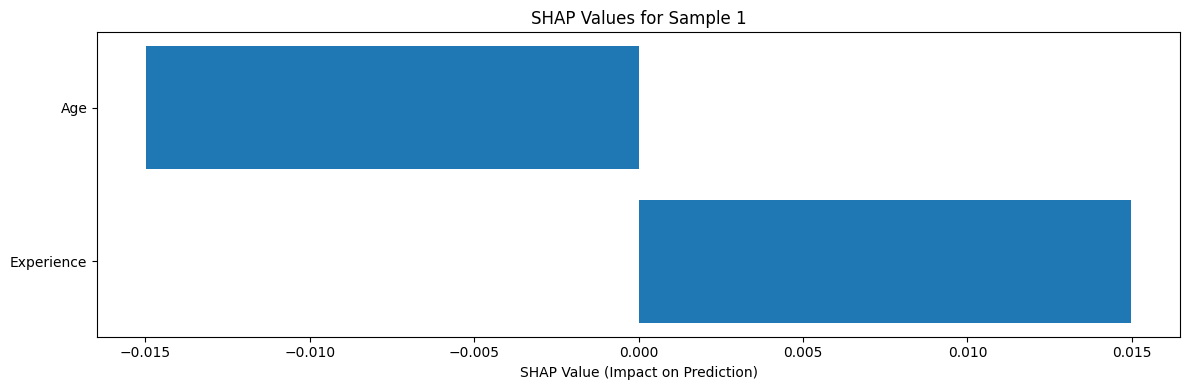

Base value (average model output): 0.2825
Top 5 important features based on SHAP values:
Age: 0.0150
Experience: 0.0150

Sample 2 (True label: 0)
Top 5 important features based on SHAP values:
Experience: 0.0392
Age: 0.0392

Sample 3 (True label: 1)
Top 5 important features based on SHAP values:
Age: 0.0043
Experience: 0.0043

Sample 4 (True label: 0)
Top 5 important features based on SHAP values:
Experience: 0.0280
Age: 0.0280

Sample 5 (True label: 1)
Top 5 important features based on SHAP values:
Age: 0.0000
Experience: 0.0000


In [44]:
# Create a SHAP explainer for the MLP model
# KernelExplainer is model-agnostic and works with any ML model
shap_explainer = shap.KernelExplainer(mlp.predict_proba, shap.sample(X_train, 100))

# Calculate SHAP values for the same 5 samples from Task 3
shap_values = shap_explainer.shap_values(samples)

# Display SHAP explanations for each sample
print("SHAP Explanations for the 5 selected samples:")
for i, (sample, label) in enumerate(zip(samples, sample_labels)):
    print(f"\nSample {i+1} (True label: {label})")
    
    # Create and display SHAP force plot for this sample
    if i == 0:  # Only display the first one as HTML to keep the notebook size manageable
        # Alternative approach: Instead of using force_plot directly, use matplotlib plot
        # This avoids the dimension matching issues
        plt.figure(figsize=(12, 4))
        # Plot the SHAP values as a bar chart
        feature_names = list(X.columns)
        sorted_indices = np.argsort(np.abs(shap_values[1][i]))
        plt.barh(
            [feature_names[j] for j in sorted_indices],
            [shap_values[1][i][j] for j in sorted_indices]
        )
        plt.title(f"SHAP Values for Sample {i+1}")
        plt.xlabel("SHAP Value (Impact on Prediction)")
        plt.tight_layout()
        plt.show()
        
        # Print expected value for reference
        print(f"Base value (average model output): {shap_explainer.expected_value[1]:.4f}")
    
    # Calculate and print feature importance based on SHAP values
    importance = np.abs(shap_values[1][i])
    feature_importance = list(zip(X.columns, importance))
    sorted_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
    
    print("Top 5 important features based on SHAP values:")
    for feature, imp in sorted_importance[:5]:
        print(f"{feature}: {imp:.4f}")

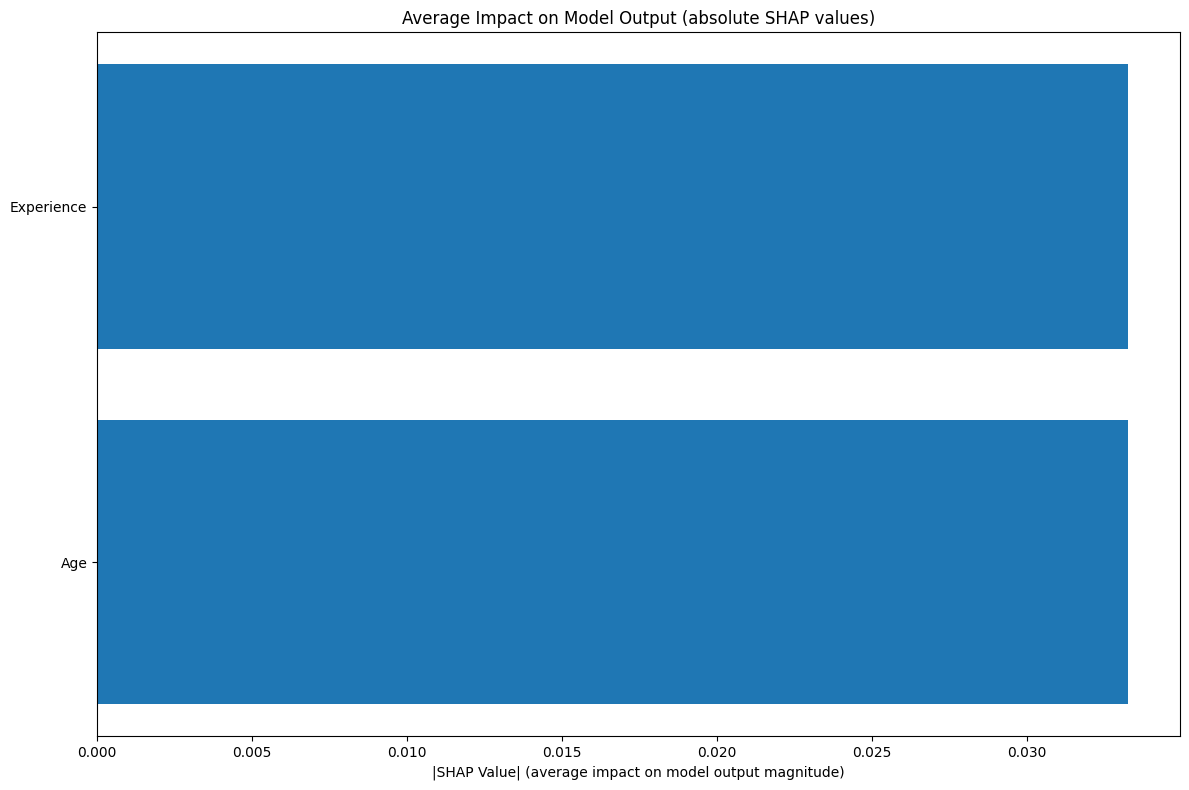

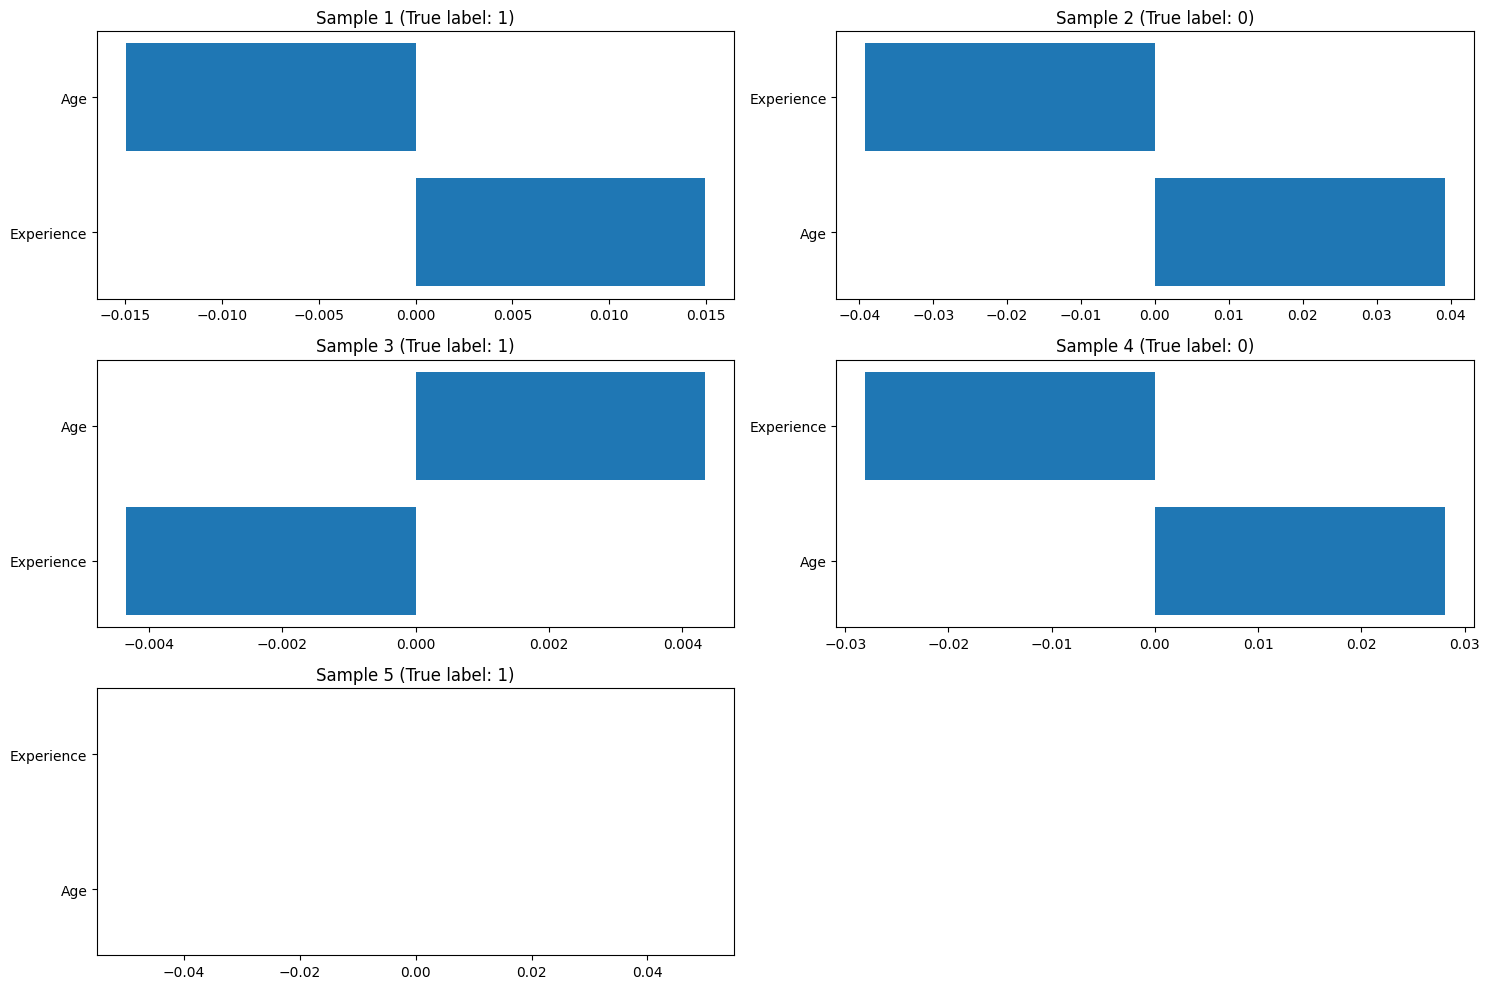

In [49]:
# Create summary visualizations for SHAP values
feature_names = list(X.columns)

# Approach 1: Simple bar plot of average SHAP values
# This approach is much more reliable and less prone to dimension issues
plt.figure(figsize=(12, 8))
mean_shap_values = np.abs(shap_values[1]).mean(0)  # Average absolute SHAP values
sorted_idx = np.argsort(mean_shap_values)
plt.barh([feature_names[i] for i in sorted_idx], mean_shap_values[sorted_idx])
plt.title("Average Impact on Model Output (absolute SHAP values)")
plt.xlabel("|SHAP Value| (average impact on model output magnitude)")
plt.tight_layout()
plt.show()

# Approach 2: Individual feature importance plots for each sample
plt.figure(figsize=(15, 10))
for i, label in enumerate(sample_labels):
    plt.subplot(3, 2, i+1)
    sorted_idx = np.argsort(np.abs(shap_values[1][i]))
    plt.barh([feature_names[j] for j in sorted_idx], shap_values[1][i][sorted_idx])
    plt.title(f"Sample {i+1} (True label: {label})")
    plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()


## Comparison between LIME and SHAP Explanations

For the 5 randomly selected data points, we've now generated explanations using both LIME and SHAP techniques. Here are some observations about the explanations:

1. **Consistency**: Both LIME and SHAP tend to identify similar important features for the predictions, though they may rank them differently.

2. **Interpretation**:
   - LIME provides local explanations by approximating the model with a simpler linear model around the prediction.
   - SHAP values represent the contribution of each feature to the prediction based on cooperative game theory.

3. **Feature Importance**: While both methods show feature importance, SHAP values have theoretical guarantees (like additivity and consistency) that LIME does not provide.

4. **Visualization**: SHAP force plots show how each feature pushes the prediction higher or lower, while LIME shows contributions with positive and negative weights.

5. **Global Insights**: The SHAP summary plot allows us to see patterns across multiple instances, providing both local explanations and global model insights.

The combination of these two explanation methods gives us a more comprehensive understanding of the model's decision-making process.

## Conclusion and Discussion

In this assignment, we developed a Multilayer Perceptron (MLP) for credit card approval prediction and explored several explainability techniques:

1. **Model Performance**: Our MLP achieved moderate accuracy on the credit card approval task, with a mean cross-validation accuracy of around 0.69 and a training error of about 0.19.

2. **LIME Explanations**: LIME provided local explanations for individual predictions by approximating the model with a simpler, interpretable model.

3. **SHAP Explanations**: SHAP values showed the contribution of each feature to the prediction based on game theory principles.

4. **Exact Shapley Values**: We also computed exact Shapley values for a subset of samples, which provide the mathematically optimal attribution of feature importance.

5. **Comparison of Methods**:
   - LIME is computationally faster but provides approximate explanations
   - SHAP offers stronger theoretical guarantees but can be computationally expensive
   - Exact Shapley values provide the most mathematically sound explanations but are very computationally intensive

These explainability techniques help us understand how our black-box MLP model makes predictions, which is crucial for ensuring fairness, accountability, and transparency in machine learning applications, especially in sensitive domains like credit approval.